In [1]:
import urllib.request
import json

base_url = "https://api.crossref.org/works/"

#base_doi = "10.1186/1751-0473-8-7"
base_doi = "10.1371/journal.pcbi.1004668"

In [2]:
doi_json_data = urllib.request.urlopen(base_url + base_doi)

In [3]:
doi_json_data_content = doi_json_data.read()

In [4]:
doi_data = json.loads(doi_json_data_content)

In [5]:
doi_data.keys()

dict_keys(['status', 'message-type', 'message-version', 'message'])

In [6]:
doi_data["message"].keys()

dict_keys(['indexed', 'reference-count', 'publisher', 'issue', 'license', 'content-domain', 'short-container-title', 'DOI', 'type', 'created', 'page', 'update-policy', 'source', 'is-referenced-by-count', 'title', 'prefix', 'volume', 'author', 'member', 'published-online', 'reference', 'container-title', 'original-title', 'language', 'link', 'deposited', 'score', 'subtitle', 'editor', 'short-title', 'issued', 'references-count', 'journal-issue', 'URL', 'relation', 'ISSN', 'issn-type'])

In [7]:
nodes_lst = []
for reference in doi_data["message"]["reference"]:
    nodes_lst.append(reference["DOI"])
print(nodes_lst)

['10.1186/1751-0473-8-7', '10.1371/journal.pbio.1001745', '10.1038/nature11247', '10.1371/journal.pcbi.1003326', '10.1371/journal.pcbi.1000424', '10.1371/journal.pcbi.1002598']


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
G = nx.Graph()

In [10]:
G.add_nodes_from(nodes_lst)
for ref_doi in nodes_lst:
    print(ref_doi)
    G.add_edge(base_doi, ref_doi)

10.1186/1751-0473-8-7
10.1371/journal.pbio.1001745
10.1038/nature11247
10.1371/journal.pcbi.1003326
10.1371/journal.pcbi.1000424
10.1371/journal.pcbi.1002598


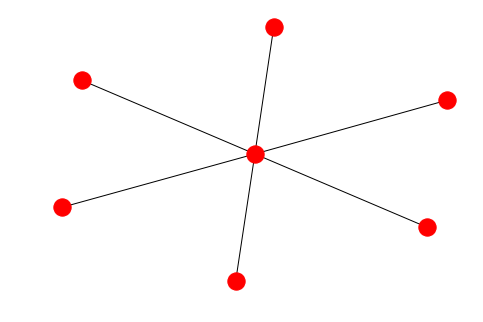

In [11]:
nx.draw(G)
plt.show()

In [12]:
def get_dois(ref_dois):
    base_url = "https://api.crossref.org/works/"
    doi_json_data = urllib.request.urlopen(base_url + ref_dois)
    doi_json_data_content = doi_json_data.read()
    doi_data = json.loads(doi_json_data_content)
    ref_dois_lst = []
    for reference in doi_data["message"]["reference"]:
        try:
            ref_dois_lst.append(reference["DOI"])
        except KeyError:
            print("NO DOI")
    return ref_dois_lst

In [13]:
get_dois("10.1186/1751-0473-8-7")

NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI


['10.1525/bio.2012.62.5.3',
 '10.1126/science.1213847',
 '10.1038/483531a',
 '10.1109/5992.881708',
 '10.1038/nature10836',
 '10.1038/478006a',
 '10.1086/650340',
 '10.1111/j.1365-2486.2012.02693.x',
 '10.1038/492348a',
 '10.1126/science.1224988',
 '10.1371/journal.pbio.1001563',
 '10.1371/journal.pone.0024914',
 '10.1093/bioinformatics/btg465',
 '10.1371/journal.pcbi.1002802',
 '10.1371/journal.pcbi.1002598',
 '10.1371/journal.pone.0000308',
 '10.1371/journal.pone.0018657',
 '10.1371/journal.pone.0024357',
 '10.1371/journal.pone.0044913']

In [14]:
def expand_graph(doi):
    for refs_dois in get_dois(doi):
            doi_for_ref = doi
            G.add_edge(doi_for_ref, refs_dois)
            try:
                for more_dois in get_dois(refs_dois):
                    more_ref_doi = refs_dois
                    G.add_edge(refs_dois, more_dois)
            except KeyError:
                print("NO DOI")                

In [15]:
expand_graph("10.1186/1751-0473-8-7")

NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
NO DOI
